#**COVID-19 Global Trend**

In [2]:
pip install sqlalchemy==1.4.46

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.3 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.0
    Uninstalling SQLAlchemy-2.0.0:
      Successfully uninstalled SQLAlchemy-2.0.0


In [3]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
pip install pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26787 sha256=6288bb35db7d764bb9c5caf8ce9fb7c6ade23d35db0495b51a64b15f401916c1
  Stored in directory: /root/.cache/pip/wheels/ed/8f/46/a383923333728744f01ba24adbd8e364f2cb9470a8b8e5b9ff
Successfully built pandasql


In [4]:
pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#**Data Transformation and Cleaning:**
#**Developers**:
#Venu Sai Ram Udayabhaskara Reddy
#Pokuri Satyavardhan
#Chaudhari Keval Vinubhai 
#Vakkalagadda Deva Sai Vikas






In [5]:
#Main libraries: 
import pandas as pd
from pandasql import sqldf
from datetime import datetime
import seaborn as sns
from matplotlib import pyplot as plt
import calendar
import plotly.express as px

In [7]:
#Loading the main covid_data data set into a dataframe by using pandas:
main_df = pd.read_csv('/content/covid_data.csv')

In [8]:
print("Number of Columns :",len(main_df.columns))
print("Number of Records :",len(main_df)) 

Number of Columns : 33
Number of Records : 228993


In [9]:
#To check the information about the Source DataFrame: 
main_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228993 entries, 0 to 228992
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   iso_code                    228993 non-null  object 
 1   continent                   216999 non-null  object 
 2   location                    228993 non-null  object 
 3   date                        228993 non-null  object 
 4   total_cases                 215930 non-null  float64
 5   new_cases                   215659 non-null  float64
 6   total_deaths                196743 non-null  float64
 7   new_deaths                  196680 non-null  float64
 8   reproduction_rate           170597 non-null  float64
 9   icu_patients                31376 non-null   float64
 10  hosp_patients               35176 non-null   float64
 11  weekly_icu_admissions       7827 non-null    float64
 12  weekly_hosp_admissions      18570 non-null   float64
 13  total_tests   

In [10]:
#Function to Preprocess the data: 
def preprocess(df): 
   prepcs_df =  df[~df["iso_code"].str.contains('OWID_')] 
   return prepcs_df

#Execute the Preprocessing Function:
df_fil = preprocess(main_df)
print(type(df_fil))

<class 'pandas.core.frame.DataFrame'>


In [11]:
#Function to clean the data and to removing all duplicates and filling null values to zeros:
def dedup(df):
  df_rmdup = df.drop_duplicates(keep=False)
  clean_df = df_rmdup.fillna(0)
  return clean_df

#Execute the Data cleaning Function:
df_cln = dedup(df_fil)
display(df_cln)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,icu_patients,...,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
0,AFG,Asia,Afghanistan,2/24/2020,5.0,5.0,0.0,0.0,0.00,0.0,...,54.422,18.6,2.581,1.337,1803.987,37.746,0.5,64.83,0.511,40099462
1,AFG,Asia,Afghanistan,2/25/2020,5.0,0.0,0.0,0.0,0.00,0.0,...,54.422,18.6,2.581,1.337,1803.987,37.746,0.5,64.83,0.511,40099462
2,AFG,Asia,Afghanistan,2/26/2020,5.0,0.0,0.0,0.0,0.00,0.0,...,54.422,18.6,2.581,1.337,1803.987,37.746,0.5,64.83,0.511,40099462
3,AFG,Asia,Afghanistan,2/27/2020,5.0,0.0,0.0,0.0,0.00,0.0,...,54.422,18.6,2.581,1.337,1803.987,37.746,0.5,64.83,0.511,40099462
4,AFG,Asia,Afghanistan,2/28/2020,5.0,0.0,0.0,0.0,0.00,0.0,...,54.422,18.6,2.581,1.337,1803.987,37.746,0.5,64.83,0.511,40099462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228988,ZWE,Africa,Zimbabwe,10/20/2022,257893.0,0.0,5606.0,0.0,0.59,0.0,...,42.729,19.6,2.822,1.882,1899.775,36.791,1.7,61.49,0.571,15993524
228989,ZWE,Africa,Zimbabwe,10/21/2022,257893.0,0.0,5606.0,0.0,0.58,0.0,...,42.729,19.6,2.822,1.882,1899.775,36.791,1.7,61.49,0.571,15993524
228990,ZWE,Africa,Zimbabwe,10/22/2022,257893.0,0.0,5606.0,0.0,0.00,0.0,...,42.729,19.6,2.822,1.882,1899.775,36.791,1.7,61.49,0.571,15993524
228991,ZWE,Africa,Zimbabwe,10/23/2022,257893.0,0.0,5606.0,0.0,0.00,0.0,...,42.729,19.6,2.822,1.882,1899.775,36.791,1.7,61.49,0.571,15993524


In [12]:
#Function to select the required columns and to generate a total_beds column which is need for further transformation:

def transform(df):
  sqlout_df = sqldf("select iso_code,continent,location,date,total_cases, \
               new_cases,total_deaths,new_deaths,reproduction_rate,icu_patients, \
               hosp_patients,weekly_icu_admissions,weekly_hosp_admissions,total_tests,new_tests, \
               positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated, \
               total_boosters,new_vaccinations,stringency_index,population_density,median_age,aged_65_older, \
               aged_70_older,gdp_per_capita,handwashing_facilities, \
               hospital_beds_per_thousand,life_expectancy,human_development_index,\
               population, (round((population/1000) * hospital_beds_per_thousand)) as total_beds from df")
  return sqlout_df

#To execute the function and to check the information about the DataFrame: 
trnfm_df = transform(df_cln)

trnfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211925 entries, 0 to 211924
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   iso_code                    211925 non-null  object 
 1   continent                   211925 non-null  object 
 2   location                    211925 non-null  object 
 3   date                        211925 non-null  object 
 4   total_cases                 211925 non-null  float64
 5   new_cases                   211925 non-null  float64
 6   total_deaths                211925 non-null  float64
 7   new_deaths                  211925 non-null  float64
 8   reproduction_rate           211925 non-null  float64
 9   icu_patients                211925 non-null  float64
 10  hosp_patients               211925 non-null  float64
 11  weekly_icu_admissions       211925 non-null  float64
 12  weekly_hosp_admissions      211925 non-null  float64
 13  total_tests   

In [13]:
#Below logic is to generate descriptive statistics of each location:
stat_df = sqldf("select location,total_cases,total_deaths,people_fully_vaccinated,population,total_beds from {a} ".format(a = 'trnfm_df'))
with pd.option_context('display.max_colwidth', None,'display.max_columns', None, 'display.max_rows', None): 
    display((stat_df.groupby('location').describe().apply(lambda s: s.apply('{0:.5f}'.format))))

total_cases                                  \
                                       count            mean             std   
location                                                                       
Afghanistan                        974.00000    104549.42813     68155.80456   
Albania                            973.00000    144060.36896    112997.34127   
Algeria                            973.00000    149905.06166     95944.16162   
Andorra                            967.00000     18711.07859     16332.87235   
Angola                             949.00000     48255.97998     39527.71399   
Anguilla                           941.00000      1120.17641      1432.33280   
Antigua and Barbuda                956.00000      3213.22071      3427.26048   
Argentina                         1028.00000   4163860.39202   3599751.48909   
Armenia                            995.00000    225972.42814    155678.33140   
Aruba                              956.00000     16834.67469     14981.28680   
Australia                         1003.00000   2007382.35394   3436942.33684   
Austria                            973.00000   1477418.57246   1777209.42532   
Azerbaijan                         968.00000    393791.50310    303401.91453   
Bahamas                            953.00000     17214.95488     13364.25185   
Bahrain                            974.00000    269295.98871    226547.50107   
Bangladesh                         961.00000   1074235.90010    732667.22071   
Barbados                           952.00000     26626.93067     35522.95334   
Belarus                            970.00000    472641.30412    361217.39310   
Belgium                            994.00000   1655552.40543   1617450.34038   
Belize                             946.00000     26078.62791     24672.59950   
Benin                              953.00000     13747.62225     11220.89382   
Bermuda                            950.00000      5714.36737      6364.64080   
Bhutan                             963.00000     14356.93043     23662.15349   
Bolivia                            958.00000    468649.21712    363283.04906   
Bonaire Sint Eustatius and Saba    936.00000      3579.32372      4209.00070   
Bosnia and Herzegovina             964.00000    200257.54461    142507.21710   
Botswana                           939.00000    134778.33333    127335.65688   
Brazil                             972.00000  16744955.11214  11695732.09132   
British Virgin Islands             941.00000      2602.56642      2872.47592   
Brunei                             960.00000     46153.32292     76875.46155   
Bulgaria                           961.00000    528697.69303    455620.62158   
Burkina Faso                       959.00000     12073.61418      7781.51025   
Burundi                            938.00000     17139.57249     18439.57579   
Cambodia                          1002.00000     60469.38323     60753.57617   
Cameroon                           963.00000     69057.63032     44893.51053   
Canada                            1006.00000   1639702.53976   1491491.68090   
Cape Verde                         949.00000     30517.61328     22227.59615   
Cayman Islands                     956.00000      8061.06695     11238.76069   
Central African Republic           954.00000      8655.92348      4895.84715   
Chad                               950.00000      4384.21368      2576.75828   
Chile                              975.00000   1714545.39077   1452714.60091   
China                             1007.00000    256027.16286    320332.19436   
Colombia                           963.00000   3482270.37383   2362479.38738   
Comoros                            908.00000      4307.87665      3061.31010   
Congo                              954.00000     13333.34696      8700.74228   
Cook Islands                       522.00000      2287.63985      2808.84437   
Costa Rica                         963.00000    434595.83904    362806.80866   
Cote d'Ivoire                    

#**Developer** : Koyya Venu Sai Ram Udayabhaskara Reddy
#**Problem statement - 1** : To determine the number of days in each continent without cases and with cases.

In [36]:
#Function to find out the the total_days with out cases and deaths.
def case_1(trnfm_df):
  case1_df = sqldf(" select a.location,a.Total_days,a.[Num_days | % without_cases], c.Num_days_without_deaths || ' | ' || \
  round(cast(c.Num_days_without_deaths * 1.0 / a.Total_days as  float)*100) || '%' as [Num_days | % without_deaths] from \
  (select a.location,a.Total_days, b.Num_days_without_cases || ' | ' || round(cast(Num_days_without_cases * 1.0  \
  / Total_days as float)*100) || '%' as [Num_days | % without_cases] from (select location,count(date) as \
  Total_days from trnfm_df group by location) a left join \
  (select location,count(date) as Num_days_without_cases from trnfm_df where new_cases = 0 group by location) b on \
  a.location = b.location) a left join (select location,count(date) as Num_days_without_deaths from trnfm_df where \
  total_deaths = 0 group by location) c on a.location = c.location")
  return case1_df

with pd.option_context('display.max_colwidth', None,'display.max_columns', None, 'display.max_rows', None):
  display(case_1(trnfm_df).fillna(0))

,location,Total_days,Num_days | % without_cases,Num_days | % without_deaths
0,Afghanistan,974,72 | 7.0%,28 | 3.0%
1,Albania,973,51 | 5.0%,15 | 2.0%
2,Algeria,973,27 | 3.0%,16 | 2.0%
3,Andorra,967,465 | 48.0%,20 | 2.0%
4,Angola,949,268 | 28.0%,9 | 1.0%
5,Anguilla,941,817 | 87.0%,542 | 58.0%
6,Antigua and Barbuda,956,621 | 65.0%,25 | 3.0%
7,Argentina,1028,234 | 23.0%,67 | 7.0%
8,Armenia,995,186 | 19.0%,52 | 5.0%
9,Aruba,956,315 | 33.0%,33 | 3.0%


**Problem statement -2:**	How much of the world's population was affected by the coronavirus, and what percentage of people died as a result.

,Value
Category,
total_deaths,3502737553
total_cases,227384712151
population,7804680431926


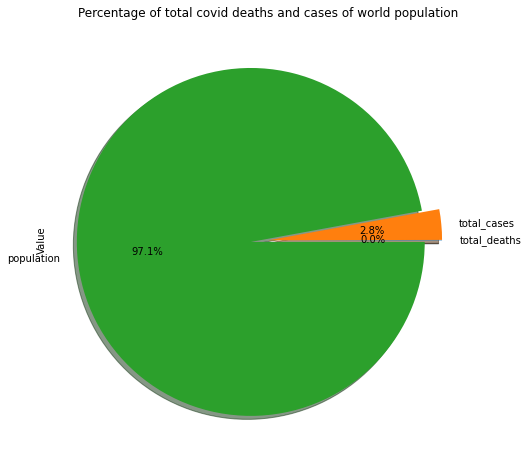

In [15]:
#Function to find average of total deaths and cases of world population:
 
def case_2(trnfm_df):
  case2_out = sqldf("select sum(total_deaths) as total_deaths,sum(total_cases) as  total_cases,sum(population) as population from {a}".format(a = 'trnfm_df'))
  case2_out_df = case2_out.melt( var_name="Category", value_name="Value")
  case2_out_df['Value'] = case2_out_df['Value'].astype('int64') 
  case2_out_df.set_index('Category', inplace=True)
  return case2_out_df

#Function execution and plotting the output:
case2_df = case_2(trnfm_df)
display(case2_df)
plot = case2_df.plot.pie(y='Value', title="Percentage of total covid deaths and cases of world population", legend=False, \
                    autopct='%1.1f%%', explode=(0, 0, 0.1), \
                    shadow=True, startangle=0, figsize=(10,8))


#**Developer** : Pokuri Satyavardhan 
#**Problem statement - 3** : Which year had the most COVID cases on each continent.

In [23]:
#Function to transform the data to capture total cases and deaths in each year:

def case_3_4_transform(trnfm_df): 
  case3_out = sqldf("select * from {a} ".format(a="trnfm_df"))
  case3_out["date"] = pd.to_datetime(case3_out["date"])
  case3_out['year'] = pd.DatetimeIndex(case3_out['date']).year
  case3_out['month'] = pd.DatetimeIndex(case3_out['date']).month
  case3_out['monthabb'] = case3_out['month'].apply(lambda x: calendar.month_abbr[x])
  case3_output = sqldf("select continent,year,sum(total_cases) as total_cases,sum(total_deaths) as total_deaths from case3_out group by continent,year ")
  return case3_output

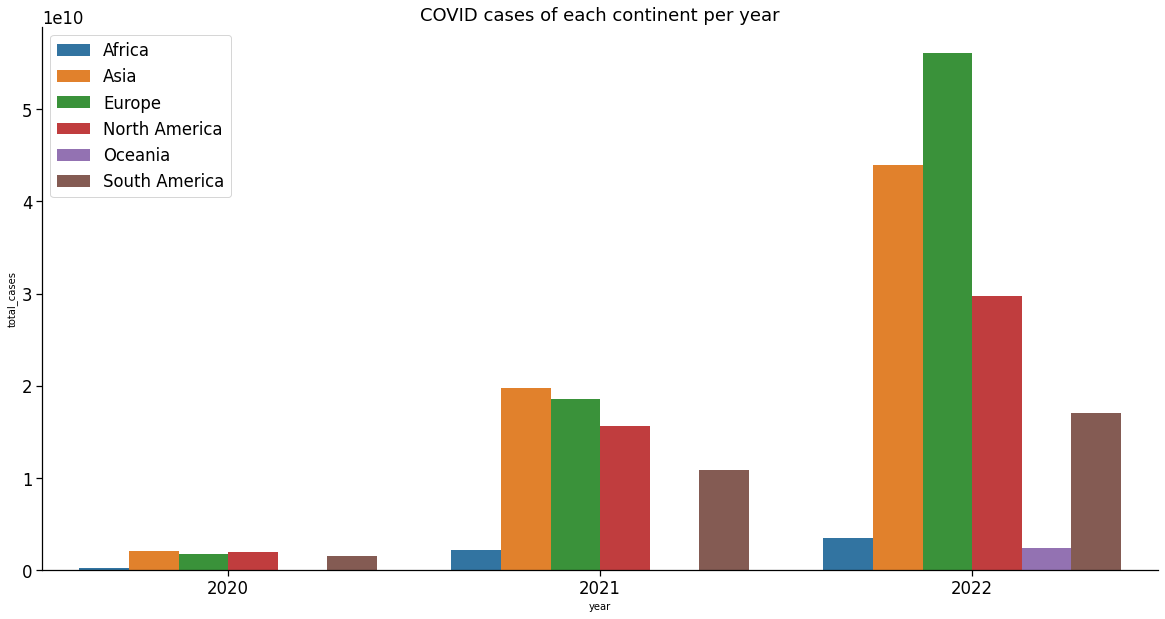

In [24]:
#Executing the function and plot the data for total COVID cases on each continent per year:

total_cases_df = case_3_4_transform(trnfm_df)

fig,ax = plt.subplots(figsize=(20, 10))
sns.despine()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})

sns.barplot(x="year", y="total_cases", data=total_cases_df, hue='continent')
ax.set_ylabel(ylabel = 'total_cases', fontsize = 10)
ax.set_xlabel(xlabel = 'year', fontsize = 10)
ax.set_title('COVID cases of each continent per year')
ax.legend();

#**Problem statement - 4**: Which year had the most COVID deaths on each continent.

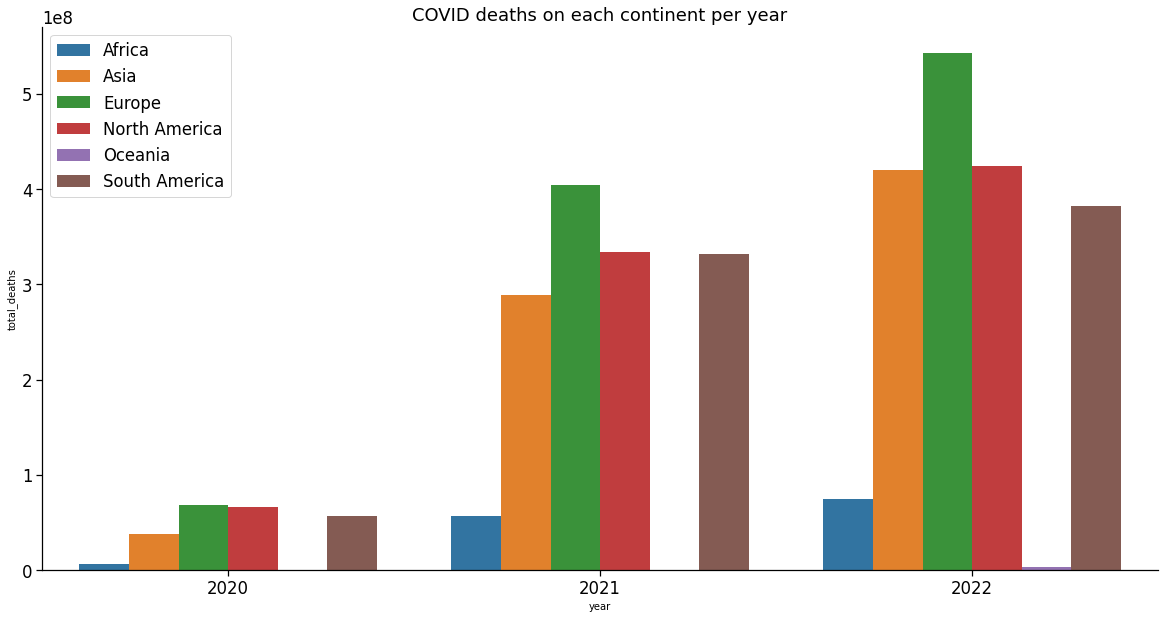

In [25]:
#Executing the function and plot the data for total number of COVID deaths on each continent per year:

total_deaths_df = case_3_4_transform(trnfm_df)

fig,ax = plt.subplots(figsize=(20, 10))
sns.despine()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})

sns.barplot(x="year", y="total_deaths", data=total_deaths_df, hue='continent')
ax.set_ylabel(ylabel = 'total_deaths', fontsize = 10)
ax.set_xlabel(xlabel = 'year', fontsize = 10)
ax.set_title('COVID deaths on each continent per year')
ax.legend();

#**Developer**: Vakkalagadda Deva Sai Vikas
#**Problem statement - 5**: Which month had the most COVID cases on each continent.

In [26]:
#Function to transform the data to capture total cases and deaths in each month:
def case_5_6_transform(trnfm_df): 
  case4_out = sqldf("select * from {a} ".format(a="trnfm_df"))
  case4_out["date"] = pd.to_datetime(case4_out["date"])
  case4_out['year'] = pd.DatetimeIndex(case4_out['date']).year
  case4_out['month'] = pd.DatetimeIndex(case4_out['date']).month
  case4_out['monthabb'] = case4_out['month'].apply(lambda x: calendar.month_abbr[x])
  case4_output = sqldf("select continent,monthabb,sum(total_cases) as total_cases,sum(total_deaths) as total_deaths from case4_out group by continent,monthabb order by month ")
  case4_output['total_cases'] = case4_output['total_cases'].astype('int64') 
  return case4_output

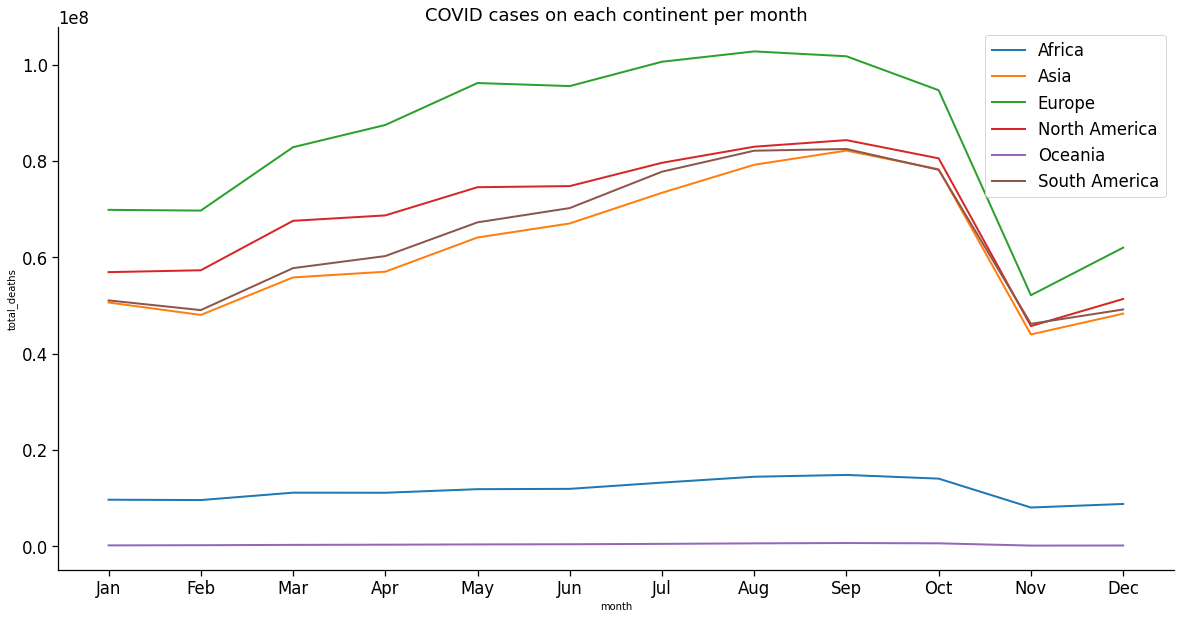

In [27]:
#Executing the function and plot the data for total number of COVID cases on each continent per month:
df_case_per_month = case_5_6_transform(trnfm_df)
fig,ax = plt.subplots(figsize=(20, 10))
sns.despine()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})

sns.lineplot(x="monthabb", y="total_deaths", data=df_case_per_month, hue='continent')
ax.set_ylabel(ylabel = 'total_deaths', fontsize = 10)
ax.set_xlabel(xlabel = 'month', fontsize = 10)
ax.set_title('COVID cases on each continent per month')
ax.legend();

#**Problem statement - 6**: Which month had the most COVID deaths on each continent.

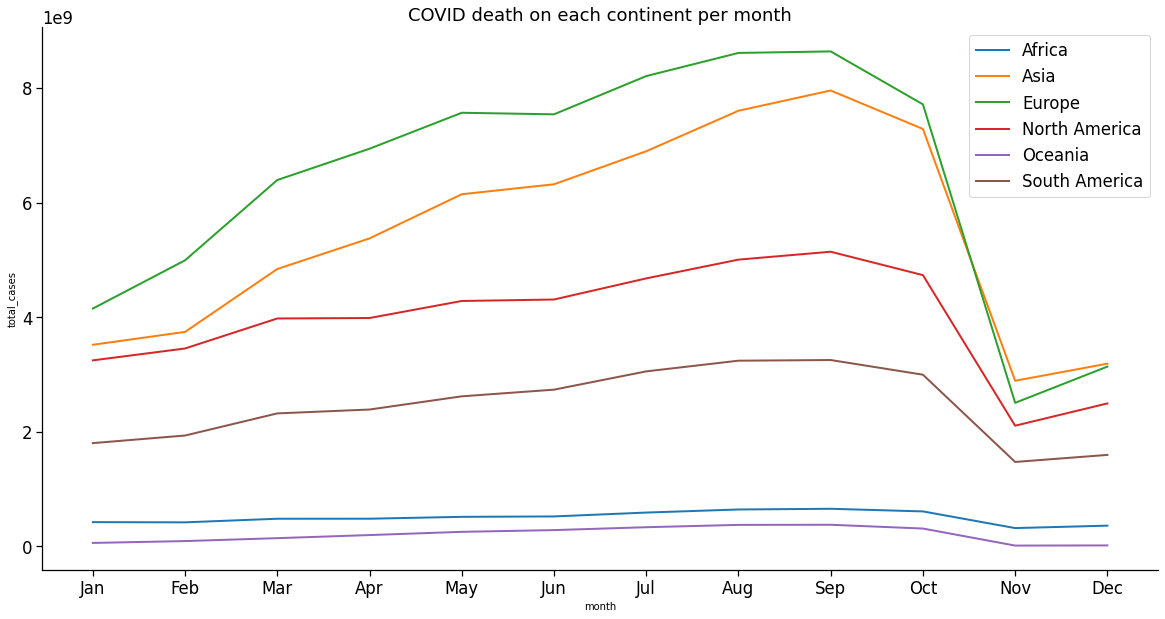

In [29]:
#Executing the function and plot the data for total number of COVID death on each continent per month:
df_death_per_month = case_5_6_transform(trnfm_df)
fig,ax = plt.subplots(figsize=(20, 10))
sns.despine()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})

sns.lineplot(x="monthabb", y="total_cases", data=df_death_per_month, hue='continent')
ax.set_ylabel(ylabel = 'total_cases', fontsize = 10)
ax.set_xlabel(xlabel = 'month', fontsize = 10)
ax.set_title('COVID death on each continent per month')
ax.legend();

#**Developer** : Chaudhari Keval Vinubhai
#**Problem statement - 7** : Determine how many people on each continent are fully vaccinated.

In [30]:
#Function to transform the data to capture fully vaccinated,partial vaccinated and booster dose:
def vacc_chk(trnfm_df):
  out_df = sqldf("select continent,sum(total_cases)as total_cases,sum(total_deaths) as total_deaths,\
               sum(population) as population,sum(total_vaccinations) as total_vaccinations, \
               sum(people_vaccinated) as people_vaccinated,sum(people_fully_vaccinated) as people_fully_vaccinated, \
               sum(total_boosters) as total_boosters from trnfm_df group by continent")
  out_df[['total_cases','total_vaccinations','people_vaccinated','people_fully_vaccinated','total_boosters']] = out_df[['total_cases','total_vaccinations','people_vaccinated','people_fully_vaccinated','total_boosters']].astype('int64') 
  return out_df

def fully_par_vacc():
  case7_out = sqldf("select * from {a} ".format(a="trnfm_df"))
  case7_out["date"] = pd.to_datetime(case7_out["date"])
  case7_out['year'] = pd.DatetimeIndex(case7_out['date']).year
  case7_out['month'] = pd.DatetimeIndex(case7_out['date']).month
  case7_out['monthabb'] = case7_out['month'].apply(lambda x: calendar.month_abbr[x])
  fully_df = sqldf("select continent,year,sum(people_vaccinated) as people_partially_vaccinated,sum(people_fully_vaccinated) as people_fully_vaccinated, sum(total_boosters) as total_boosters from case7_out group by continent,year ")
  return fully_df

In [32]:
case_7_df = vacc_chk(trnfm_df)
case_7_fin = sqldf("select continent,people_vaccinated as people_partially_vaccinated,people_fully_vaccinated,total_boosters from case_7_df")
display(case_7_fin)

,continent,people_partially_vaccinated,people_fully_vaccinated,total_boosters
0,Africa,22914439970,16717917389,1487286822
1,Asia,754211778568,610118264252,126220755175
2,Europe,190342988257,168132803390,73796154554
3,North America,177828818238,149285513214,47290062889
4,Oceania,9959299551,8707332169,3621570448
5,South America,128429858783,104434068781,44469526607


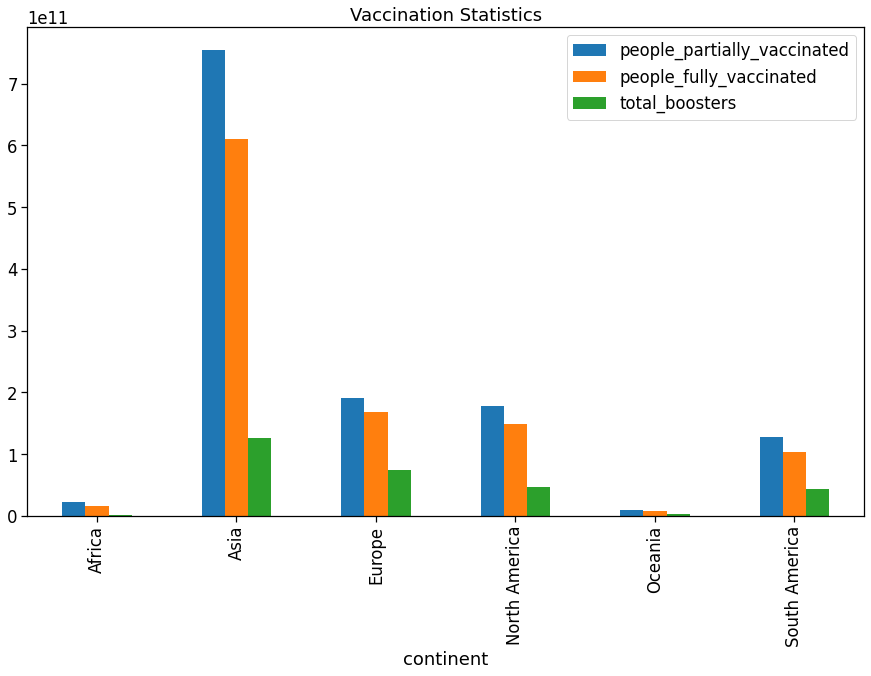

In [33]:
#Plot logic for vaccination
case_7_fin.plot(x='continent', y=["people_partially_vaccinated", "people_fully_vaccinated","total_boosters"], kind='bar',figsize=(15, 9),title = 'Vaccination Statistics')

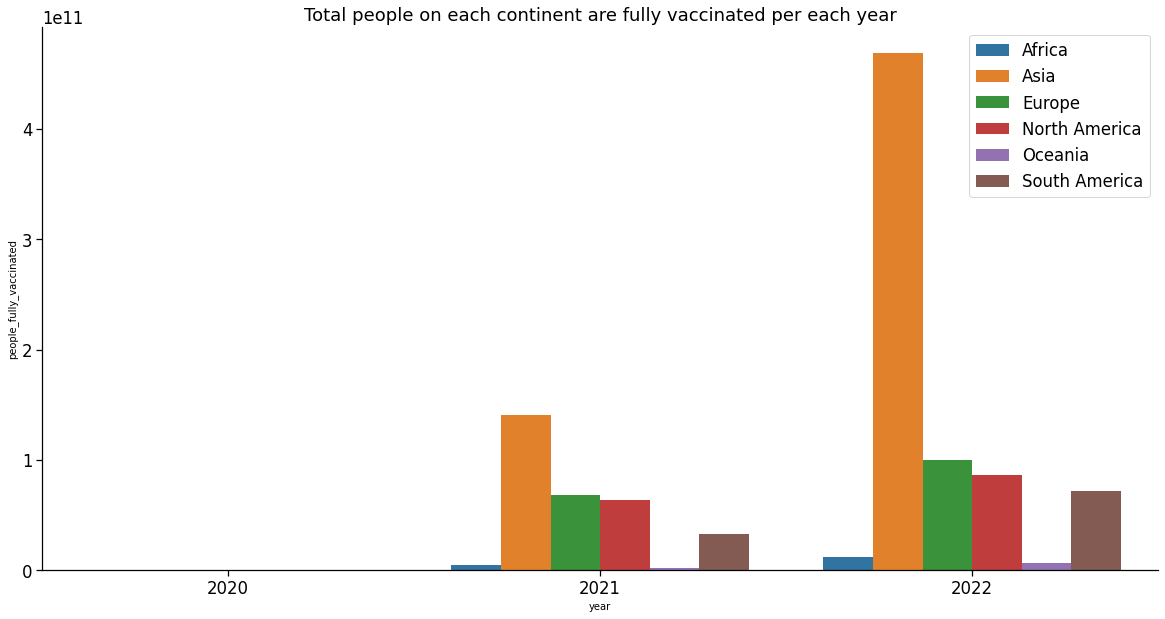

In [34]:
#Executing the function and plotting the fully vaccinated graph:
case7_fully_vacc = fully_par_vacc()
fig,ax = plt.subplots(figsize=(20, 10))
sns.despine()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})

sns.barplot(x="year", y="people_fully_vaccinated", data=case7_fully_vacc, hue='continent')
ax.set_ylabel(ylabel = 'people_fully_vaccinated', fontsize = 10)
ax.set_xlabel(xlabel = 'year', fontsize = 10)
ax.set_title('Total people on each continent are fully vaccinated per each year')
ax.legend();

#**Problem statement - 8** :Determine how many people on each continent are Partially vaccinated

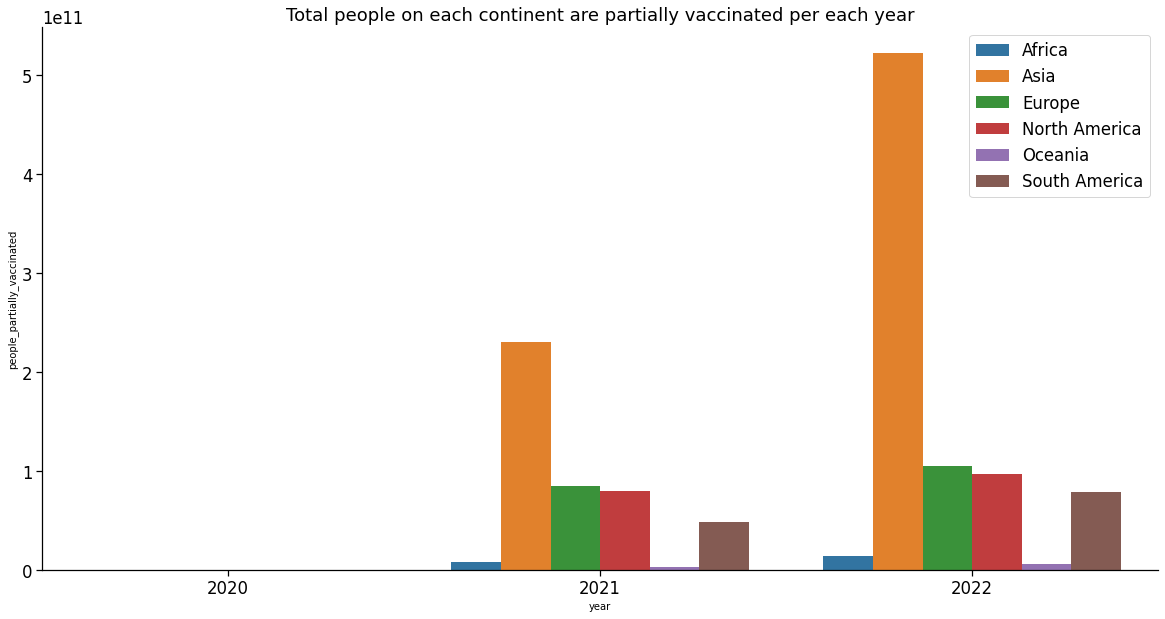

In [31]:
#Executing the function and plotting the Partially vaccinated graph:
case8_fully_vacc = fully_par_vacc()
fig,ax = plt.subplots(figsize=(20, 10))
sns.despine()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})
sns.barplot(x="year", y="people_partially_vaccinated", data=case8_fully_vacc, hue='continent')
ax.set_ylabel(ylabel = 'people_partially_vaccinated', fontsize = 10)
ax.set_xlabel(xlabel = 'year', fontsize = 10)
ax.set_title('Total people on each continent are partially vaccinated per each year')
ax.legend();

#**Problem statement - 9**:Determine how many people on each continent had a Booster dose

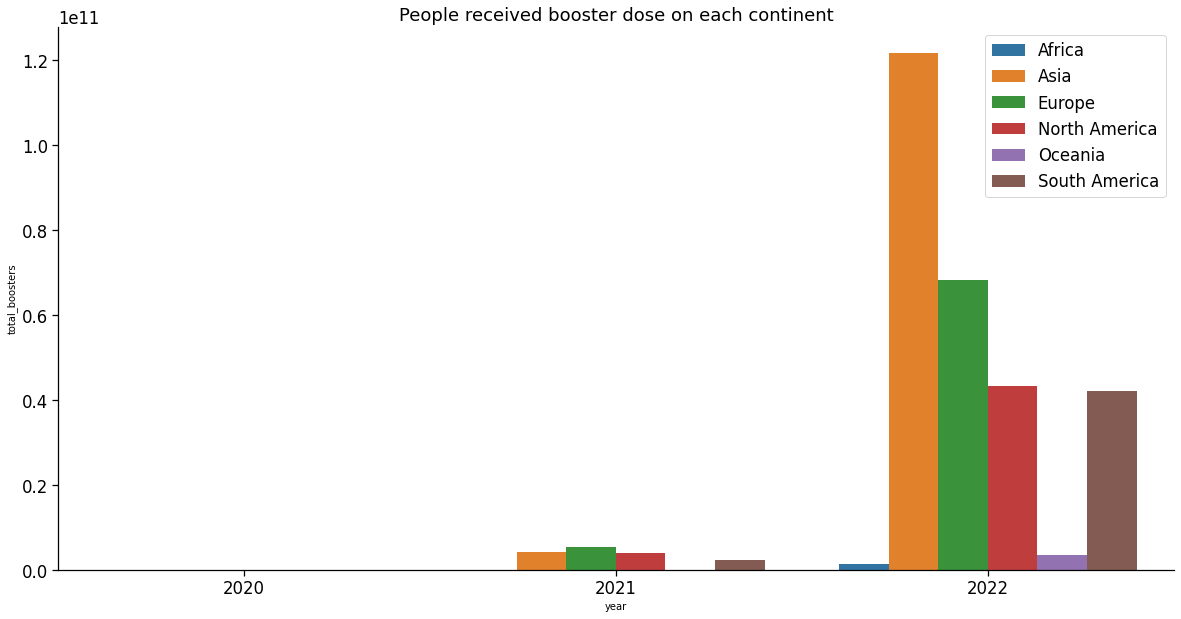

In [35]:
#Executing the function and plotting the Partially vaccinated graph:
case9_booster = fully_par_vacc()
fig,ax = plt.subplots(figsize=(20, 10))
sns.despine()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})
sns.barplot(x="year", y="total_boosters", data=case9_booster, hue='continent')
ax.set_ylabel(ylabel = 'total_boosters', fontsize = 10)
ax.set_xlabel(xlabel = 'year', fontsize = 10)
ax.set_title('People received booster dose on each continent')
ax.legend();